In [35]:
#import pandas
import pandas as pd
#import numpy
import numpy as np
#import matplotlib
import matplotlib.pyplot as plt
#import seaborn
import seaborn as sns
#import scipy.stats
import scipy.stats as stats 

In [36]:
#change directory
import os
os.chdir('C:\LY\springboard\capstone projects\cervical cancer')

In [37]:
filename = "risk_factors_cervical_cancer.csv"

In [38]:
data = pd.read_csv(filename)
#data.head(10)
#data.tail()

In [39]:
#data.info()

In [40]:
#data.columns

In [41]:
# original data uses ? to represent missing values,
# by converting object to numeric, the missing values are represented by NA
cols = data.columns[data.dtypes.eq('object')]
data[cols] = data[cols].apply(pd.to_numeric, errors='coerce')

In [63]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858 entries, 0 to 857
Data columns (total 36 columns):
Age                                   858 non-null int64
Number of sexual partners             858 non-null float64
First sexual intercourse              858 non-null float64
Num of pregnancies                    858 non-null float64
Smokes                                858 non-null float64
Smokes (years)                        858 non-null float64
Smokes (packs/year)                   858 non-null float64
Hormonal Contraceptives               858 non-null float64
Hormonal Contraceptives (years)       858 non-null float64
IUD                                   858 non-null float64
IUD (years)                           858 non-null float64
STDs                                  858 non-null float64
STDs (number)                         858 non-null float64
STDs:condylomatosis                   858 non-null float64
STDs:cervical condylomatosis          858 non-null float64
STDs:vaginal

In [43]:
data["STDs (number)"].value_counts(dropna=False)

0.0    674
NaN    105
2.0     37
1.0     34
3.0      7
4.0      1
Name: STDs (number), dtype: int64

In [44]:
data["STDs: Number of diagnosis"].value_counts()

0    787
1     68
2      2
3      1
Name: STDs: Number of diagnosis, dtype: int64

# Exclude cols 'STDs: Time since first/last diagnosis', since too much missing data

In [45]:
data['Dx:HPV'].value_counts(dropna=False)

0    840
1     18
Name: Dx:HPV, dtype: int64

# fill NA will median for numeric values

In [46]:
numeric_cols = ['Age','Number of sexual partners', 'First sexual intercourse', 'Num of pregnancies', 'Smokes (years)', 
                'Smokes (packs/year)', 'Hormonal Contraceptives (years)', 'IUD (years)', 'STDs (number)',
                'STDs: Number of diagnosis']

In [47]:
for col in numeric_cols:
    col_median = data[col].median() 
    data[col].fillna(col_median, inplace=True)

# fill NA will mode for catagorical values

In [64]:
cata_cols = ['Smokes', 'Hormonal Contraceptives', 'IUD', 'STDs', 'STDs:condylomatosis', 'STDs:cervical condylomatosis', 'STDs:vaginal condylomatosis', 
             'STDs:vulvo-perineal condylomatosis', 'STDs:syphilis', 'STDs:pelvic inflammatory disease', 'STDs:genital herpes', 
             'STDs:molluscum contagiosum', 'STDs:AIDS', 'STDs:HIV', 'STDs:Hepatitis B', 'STDs:HPV', 'Dx:Cancer', 'Dx:CIN',
             'Dx:HPV', 'Dx']

In [49]:
for col in cata_cols:
    col_mode = data[col].mode() 
    data[col].fillna(col_mode[0], inplace=True)
#data['Smokes'].value_counts(dropna = False)

# correlation between catogorical data and numeric data

In [50]:
#between "Biopsy" and "STDs " as an example

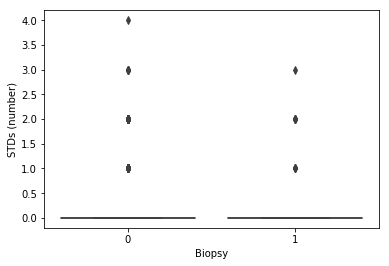

In [51]:
#plot the distribution of 'Num of pregnancies' for cancer and no cancer group with boxplot
sns.boxplot(x='Biopsy', y='STDs (number)', data=data)
plt.show()

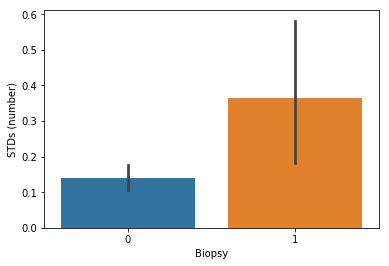

In [52]:
#plot the distribution of 'Num of pregnancies' for cancer and no cancer group with barplot
sns.barplot(x='Biopsy', y='STDs (number)', data=data)
plt.show()

In [ ]:
#seems barplot is better than boxplot for the data

In [53]:
cancer = data[data['Biopsy'] == 1]['STDs (number)']
no_cancer = data[data['Biopsy'] == 0]['STDs (number)']
stats.ttest_ind(cancer, no_cancer)

Ttest_indResult(statistic=3.0341740649763542, pvalue=0.002484849401247416)

In [54]:
# t test showed that there is significant difference. Biopsy is correlated with 'STDs (number)'

# correlation between col 'Biopsy'  and cols of numeric data

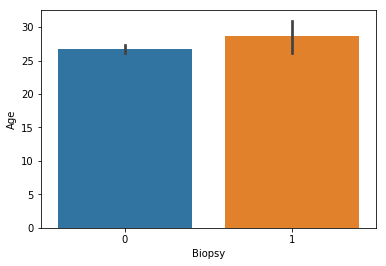

Age Ttest_indResult(statistic=1.6396861910271414, pvalue=0.10143784847300615)


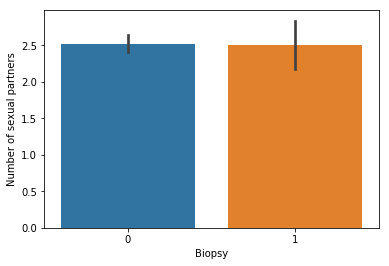

Number of sexual partners Ttest_indResult(statistic=-0.011943920213552566, pvalue=0.9904731400931277)


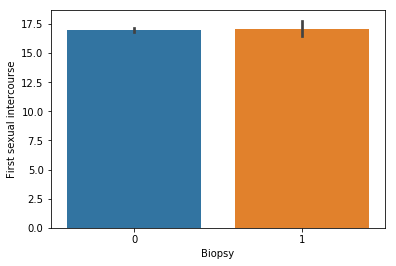

First sexual intercourse Ttest_indResult(statistic=0.21237759889798477, pvalue=0.8318630215490788)


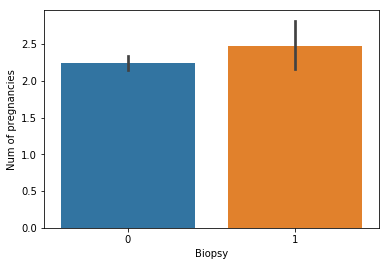

Num of pregnancies Ttest_indResult(statistic=1.177544145145654, pvalue=0.239305676444277)


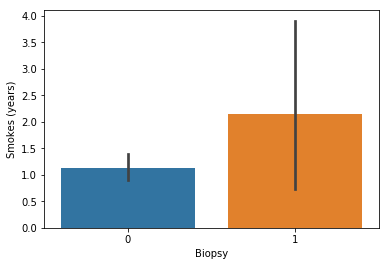

Smokes (years) Ttest_indResult(statistic=1.7940447223443308, pvalue=0.07315884010855518)


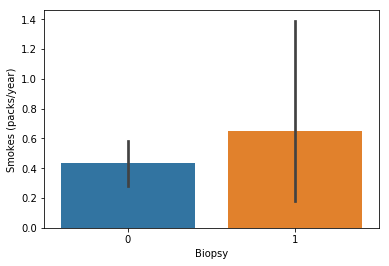

Smokes (packs/year) Ttest_indResult(statistic=0.7166388563188881, pvalue=0.4737924372922244)


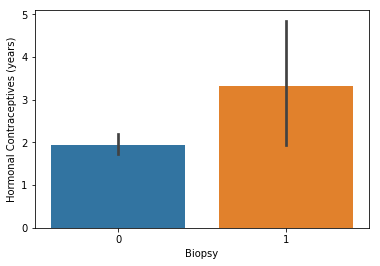

Hormonal Contraceptives (years) Ttest_indResult(statistic=2.7672863947997706, pvalue=0.00577445209971893)


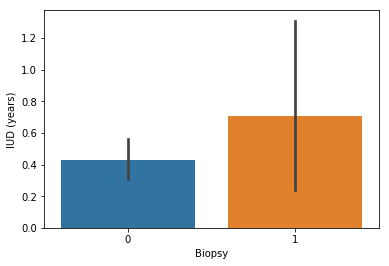

IUD (years) Ttest_indResult(statistic=1.1177522929149375, pvalue=0.2639864054750863)


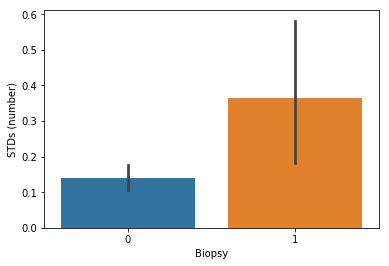

STDs (number) Ttest_indResult(statistic=3.0341740649763542, pvalue=0.002484849401247416)


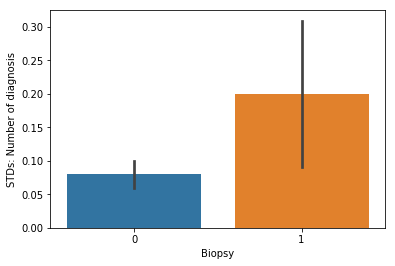

STDs: Number of diagnosis Ttest_indResult(statistic=2.864744298589144, pvalue=0.004275586992926872)


In [55]:
for col in numeric_cols:
    sns.barplot(x='Biopsy', y=col, data=data)
    plt.show()
    cancer = data[data['Biopsy'] == 1][col] 
    no_cancer = data[data['Biopsy'] == 0][col]
    print(col, stats.ttest_ind(cancer, no_cancer))    

In [56]:
#according to the p value, "Hormonal Contraceptives (years)","STDs (number)" and "STDs: Number of diagnosis" are correlated with "Biopsy"

# correlation between two catogorical data
# between 'Dx:HPX' and 'Biopsy' as an example

In [57]:
contingency_table = pd.crosstab(data['Dx:HPV'],data['Biopsy'],margins = True)
contingency_table

Biopsy,0,1,All
Dx:HPV,,,
0,791,49,840
1,12,6,18
All,803,55,858


In [58]:
f_obs = np.array([contingency_table.iloc[0][0:2].values,
                  contingency_table.iloc[1][0:2].values])
f_obs

array([[791,  49],
       [ 12,   6]], dtype=int64)

In [59]:
stats.chi2_contingency(f_obs)

(17.866604696673196,
 2.3694272473922304e-05,
 1,
 array([[786.15384615,  53.84615385],
        [ 16.84615385,   1.15384615]]))

[0.9416666666666667, 0.6666666666666666]
[0.058333333333333334, 0.3333333333333333]


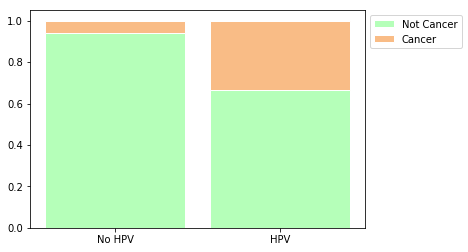

In [60]:
#plot 
r = [0,1]
greenBars = [contingency_table.iloc[0][0]/(contingency_table.iloc[0][0]+contingency_table.iloc[0][1])
              ,contingency_table.iloc[1][0]/(contingency_table.iloc[1][0]+contingency_table.iloc[1][1])]
orangeBars = [contingency_table.iloc[0][1]/(contingency_table.iloc[0][0]+contingency_table.iloc[0][1])
              ,contingency_table.iloc[1][1]/(contingency_table.iloc[1][0]+contingency_table.iloc[1][1])]
print(greenBars)
print(orangeBars)
barWidth = 0.85
names = ('No HPV','HPV')
plt.bar(r, greenBars, color='#b5ffb9', edgecolor='white', width=barWidth, label="Not Cancer")
plt.bar(r, orangeBars, bottom=greenBars, color='#f9bc86', edgecolor='white', width=barWidth, label="Cancer")
plt.xticks(r, names)
#plt.xlabel("group")
# Add a legend
plt.legend(loc='upper left', bbox_to_anchor=(1,1), ncol=1)
 
# Show graphic
plt.show()


In [61]:
#data.corr()['Biopsy'] Not correct ? this is for between two continuous variables

# correlation between col 'Biopsy' and cols of catogorical data

In [65]:
for col in cata_cols:
    contingency_table = pd.crosstab(data[col],data['Biopsy'],margins = True)
    print(contingency_table)
    f_obs = np.array([contingency_table.iloc[0][0:2].values,
                  contingency_table.iloc[1][0:2].values])
    print (col, stats.chi2_contingency(f_obs))

Biopsy    0   1  All
Smokes              
0.0     690  45  735
1.0     113  10  123
All     803  55  858
Smokes (0.4128032074841294, 0.5205501261610987, 1, array([[687.88461538,  47.11538462],
       [115.11538462,   7.88461538]]))
Biopsy                     0   1  All
Hormonal Contraceptives              
0.0                      250  19  269
1.0                      553  36  589
All                      803  55  858
Hormonal Contraceptives (0.1424882327313748, 0.7058197961871129, 1, array([[251.75641026,  17.24358974],
       [551.24358974,  37.75641026]]))
Biopsy    0   1  All
IUD                 
0.0     729  46  775
1.0      74   9   83
All     803  55  858
IUD (2.247594652582935, 0.1338222729371177, 1, array([[725.32051282,  49.67948718],
       [ 77.67948718,   5.32051282]]))
Biopsy    0   1  All
STDs                
0.0     736  43  779
1.0      67  12   79
All     803  55  858
STDs (9.625810524356968, 0.0019186175908358102, 1, array([[729.06410256,  49.93589744],
       [ 73.9

In [66]:
#according to the p value, "STDs","STDs:condylomatosis"，"STDs:vulvo-perineal condylomatosis"，"STDs:HIV"，"Dx:CIN", "Dx:HPV" and "Dx"are correlated with "Biopsy"

# plot if incidence changes by Age

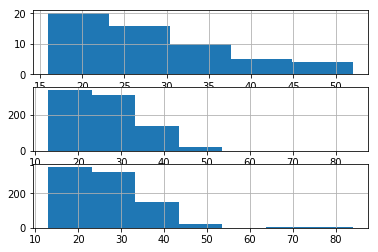

In [72]:
# people with positive Biopsy result
plt.subplot(3, 1, 1)
data[data['Biopsy'] == 1]['Age'].hist(bins=5)
plt.subplot(3, 1, 2)
data[data['Biopsy'] == 0]['Age'].hist(bins=7)
#all people
plt.subplot(3, 1, 3)
data['Age'].hist(bins=7)
plt.show()


In [ ]:
#it seems the incidence decreased with increasing age. 
#But after plotting the distribution of whole people and no cancer people, they showed the same trend.

# plot if incidence changes by Num of pregnancies

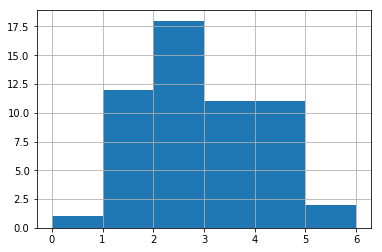

In [88]:
data[data['Biopsy'] == 1]['Num of pregnancies'].hist(bins=6)

In [26]:
Dx = data[["Dx:Cancer","Dx"]]  #Dx:Cancer previous diagosis?  Dx diagosis result?
Dx

,Dx:Cancer,Dx
0,0,0
1,0,0
2,0,0
3,1,0
4,0,0
5,0,0
6,0,0
7,0,0
8,1,1
9,0,0


In [33]:
#Dx.sort_values(['Dx:Cancer','Dx'],ascending=False)
Dx.groupby(['Dx:Cancer','Dx']).size().reset_index().rename(columns={0:'count'})

,Dx:Cancer,Dx,count
0,0,0,830
1,0,1,10
2,1,0,4
3,1,1,14


In [35]:
dignosis = data[["Dx", "Hinselmann", "Schiller","Citology","Biopsy"]]
dignosis.groupby(['Dx','Biopsy']).size().reset_index().rename(columns={0:'count'})

,Dx,Biopsy,count
0,0,0,786
1,0,1,48
2,1,0,17
3,1,1,7


# plot Age distribution

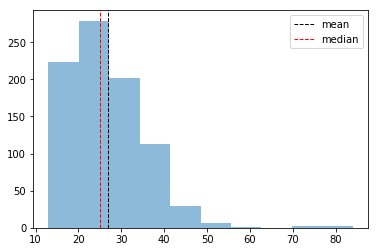

In [15]:
plt.hist(data["Age"],alpha=0.5)
plt.axvline(data["Age"].mean(), color='k', linestyle='dashed', linewidth=1, label = 'mean')
plt.axvline(data["Age"].median(), color='r', linestyle='dashed', linewidth=1,label = 'median')
plt.legend()

C:\Users\Yi\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\Yi\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


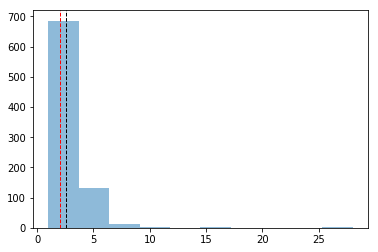

In [11]:
plt.hist(data['Number of sexual partners'],alpha=0.5)
plt.axvline(data['Number of sexual partners'].mean(), color='k', linestyle='dashed', linewidth=1)
plt.axvline(data['Number of sexual partners'].median(), color='r', linestyle='dashed', linewidth=1)